In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


Evaluación de diferentes valores de k:
--------------------------------------------------
🔹 Para k = 1:
   → Accuracy           : 0.7561
   → F1-score ponderado : 0.7561
--------------------------------------------------
🔹 Para k = 3:
   → Accuracy           : 0.8293
   → F1-score ponderado : 0.8266
--------------------------------------------------
🔹 Para k = 5:
   → Accuracy           : 0.8293
   → F1-score ponderado : 0.8107
--------------------------------------------------
🔹 Para k = 7:
   → Accuracy           : 0.7317
   → F1-score ponderado : 0.6831
--------------------------------------------------
🔹 Para k = 9:
   → Accuracy           : 0.7317
   → F1-score ponderado : 0.6831
--------------------------------------------------

✅ Mejor valor de k encontrado: 3
   → Accuracy           : 0.8293
   → F1-score ponderado : 0.8266


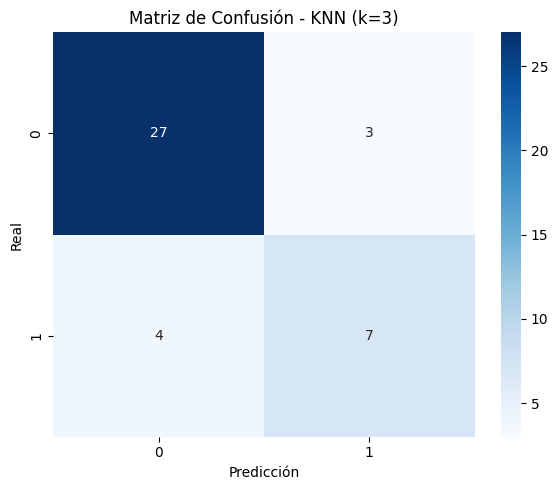

In [9]:

df_features = pd.read_csv("features_40.csv")
df_labels = pd.read_csv("Labels.csv")
df = df_features.copy()
df["label"] = df_labels.iloc[:, 0]

#Preprocesamiento
X = df.drop(columns=["label"])
y = df["label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


class SimpleKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = np.bincount(k_nearest_labels)
            most_common_label = np.argmax(most_common)
            predictions.append(most_common_label)
        return np.array(predictions)

#Busqueda del mejor k
resultados = []
print("\nEvaluación de diferentes valores de k:")
print("-" * 50)
for k in [1, 3, 5, 7, 9]:
    knn = SimpleKNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    resultados.append((k, acc, f1))

    print(f"🔹 Para k = {k}:")
    print(f"   → Accuracy           : {acc:.4f}")
    print(f"   → F1-score ponderado : {f1:.4f}")
    print("-" * 50)

# 5. Seleccionar mejor modelo
mejor_k, mejor_acc, mejor_f1 = max(resultados, key=lambda x: x[2])
mejor_modelo = SimpleKNN(k=mejor_k)
mejor_modelo.fit(X_train, y_train)
y_pred_final = mejor_modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)
print(f"\n✅ Mejor valor de k encontrado: {mejor_k}")
print(f"   → Accuracy           : {mejor_acc:.4f}")
print(f"   → F1-score ponderado : {mejor_f1:.4f}")

# 7. Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Matriz de Confusión - KNN (k={mejor_k})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


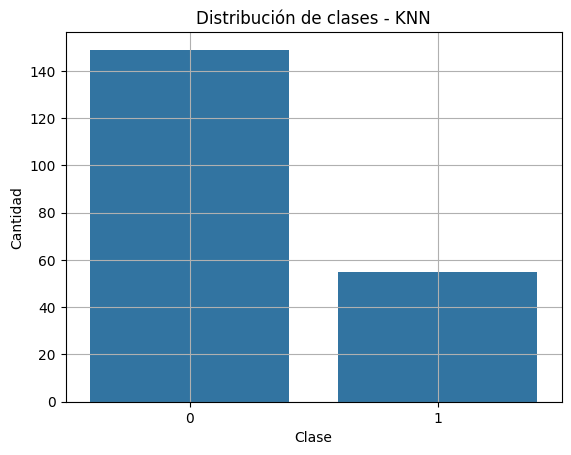

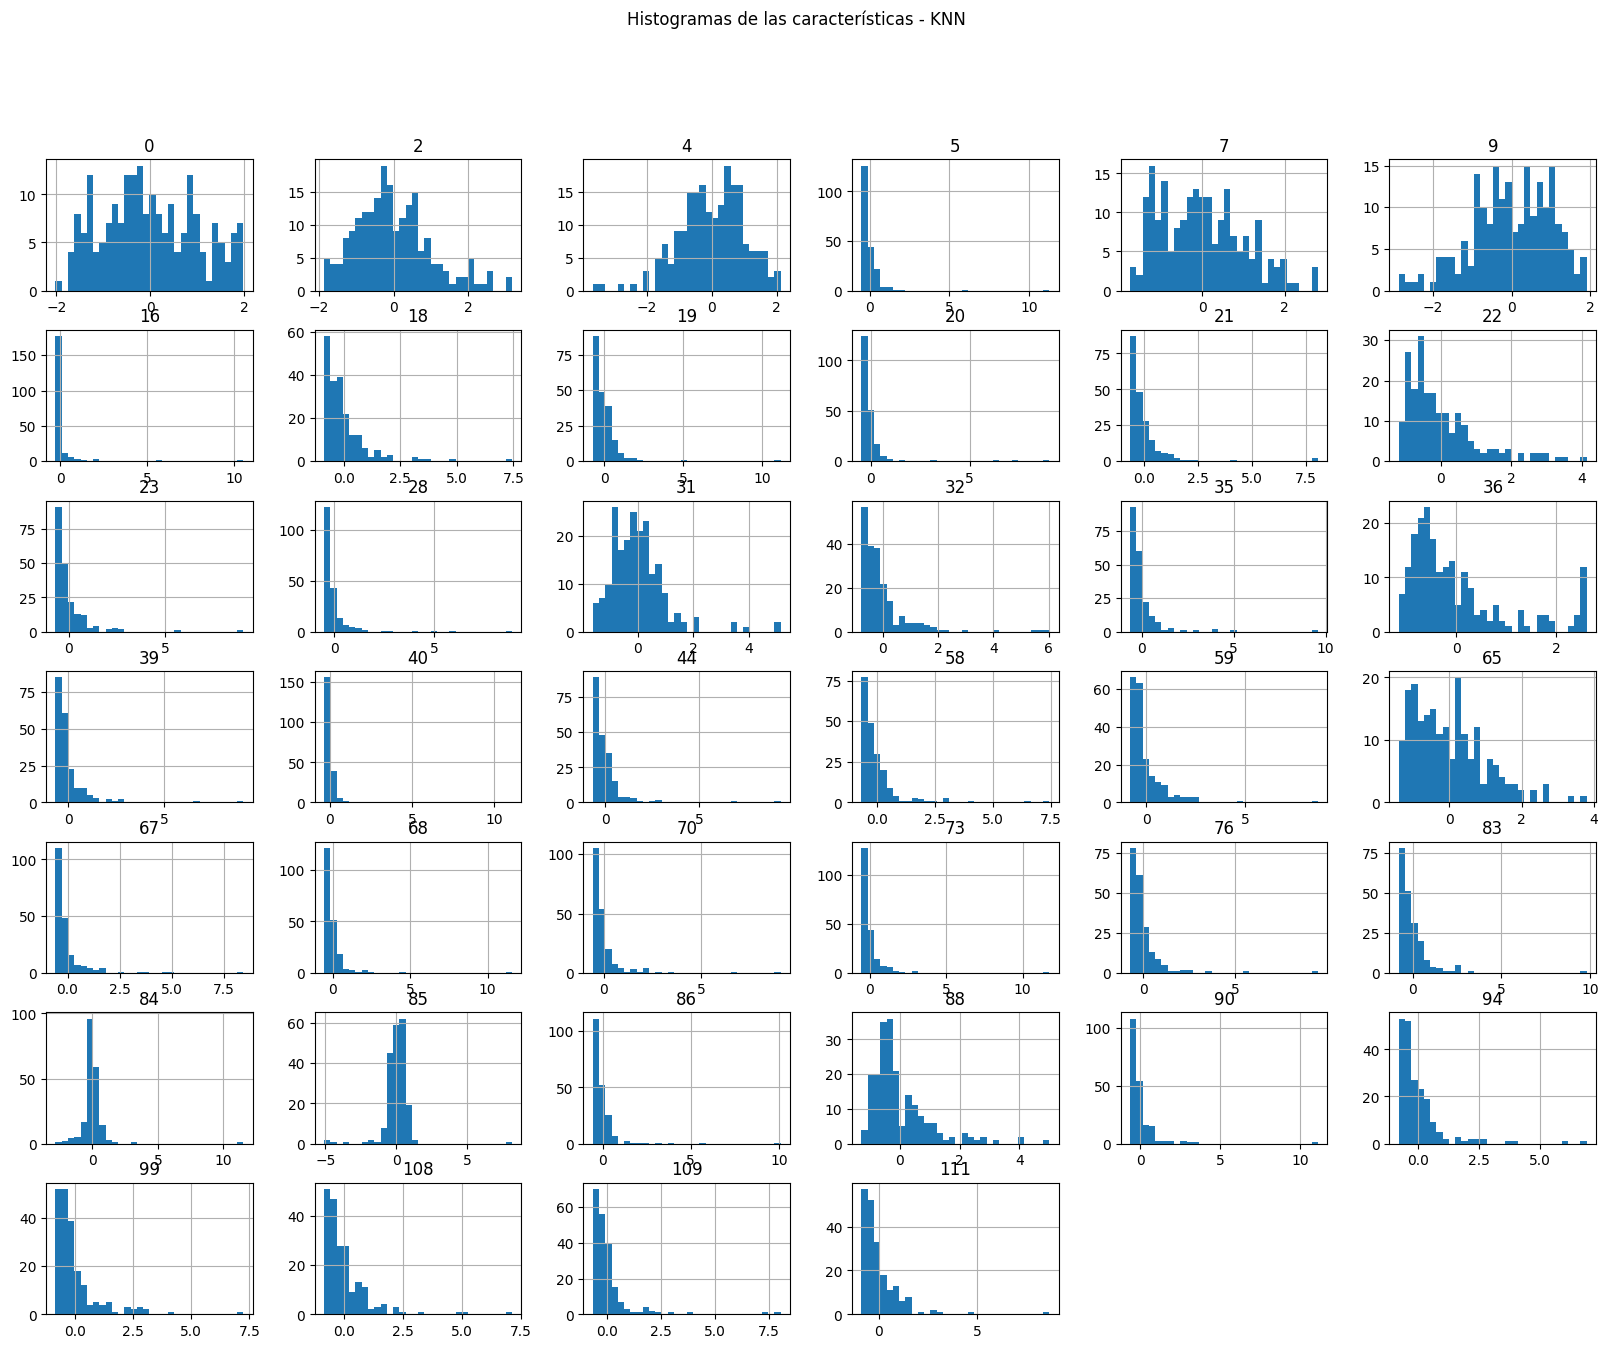

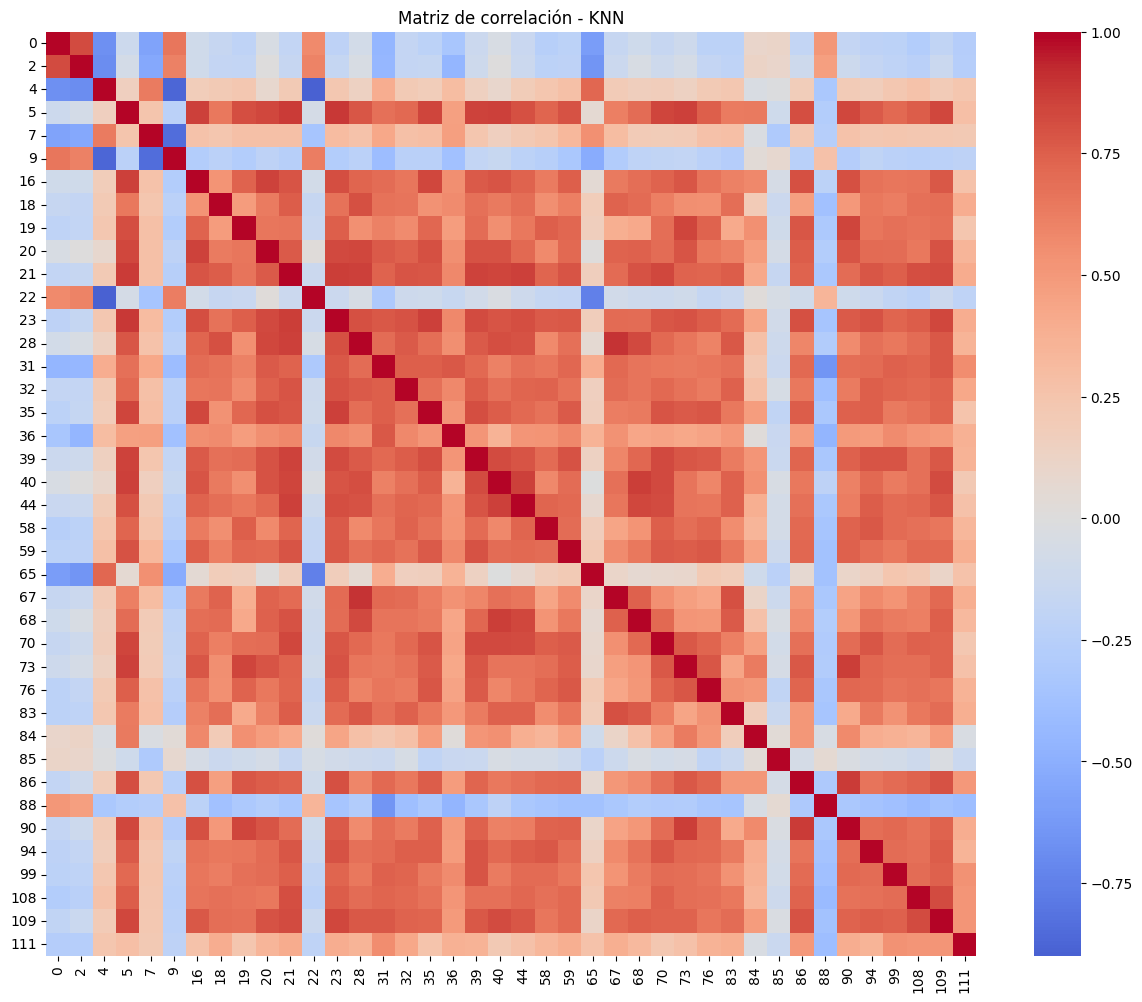

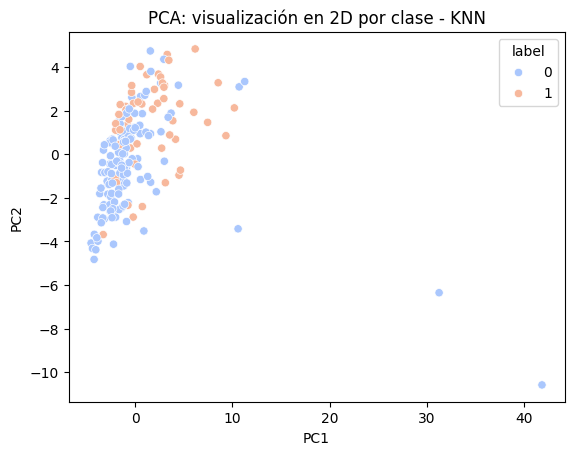

In [4]:

plt.figure()
sns.countplot(x='label', data=df)
plt.title('Distribución de clases - KNN')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

#Histogramas de características
df.drop('label', axis=1).hist(figsize=(20, 15), bins=30)
plt.suptitle("Histogramas de las características - KNN")
plt.show()

#Matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(df.drop('label', axis=1).corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación - KNN")
plt.show()

#PCA en 2D
X = df.drop('label', axis=1)
y = df['label']


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

plt.figure()
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='coolwarm')
plt.title('PCA: visualización en 2D por clase - KNN')
plt.show()
